# PREDICTIVE ANALYSIS
- David Kristian Silalahi
- MC-43

# Proyek Machine Learning: Prediksi Risiko Diabetes

Proyek ini bertujuan membangun model prediktif untuk menentukan apakah seorang pasien berisiko terkena diabetes berdasarkan data klinis. Dataset yang digunakan adalah dataset Pima Indians Diabetes.



In [4]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## 1. Memuat Dataset
Dataset dimuat dari file `diabetes.csv`. Dataset ini memiliki 768 baris dan 9 kolom, dengan label target 'Outcome'.


In [7]:
# Load data
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Pembersihan Data
Beberapa kolom seperti `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, dan `BMI` memiliki nilai nol yang tidak logis. Kita akan menggantinya dengan nilai median.


In [10]:
# Kolom yang akan diperbaiki
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Imputasi dengan median
df.fillna(df.median(), inplace=True)


## 3. Pemisahan Fitur dan Label
Kita pisahkan fitur (`X`) dan label (`y`), lalu normalisasi fitur menggunakan StandardScaler


In [13]:
# Feature & target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Membagi Data
Data dibagi menjadi data latih dan data uji dengan rasio 80:20.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 5. Pelatihan Model
Kita melatih dua model: Logistic Regression dan Random Forest.


In [19]:
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 6. Evaluasi Model
Evaluasi dilakukan menggunakan classification report dan akurasi.


In [22]:
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532467532467533

Random Forest Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Accuracy: 0.7402597402597403


## Visualisasi Korelasi dan Distribusi Data
Kita akan lihat korelasi antar fitur serta distribusi label untuk mengetahui ketidakseimbangan kelas.


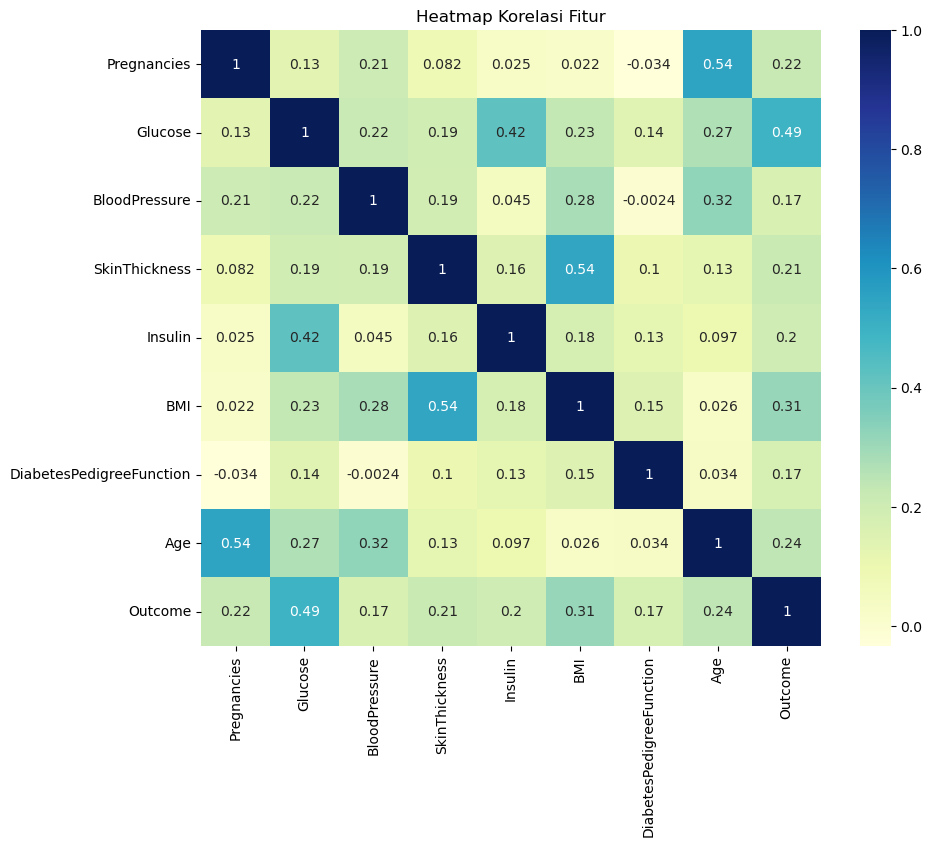

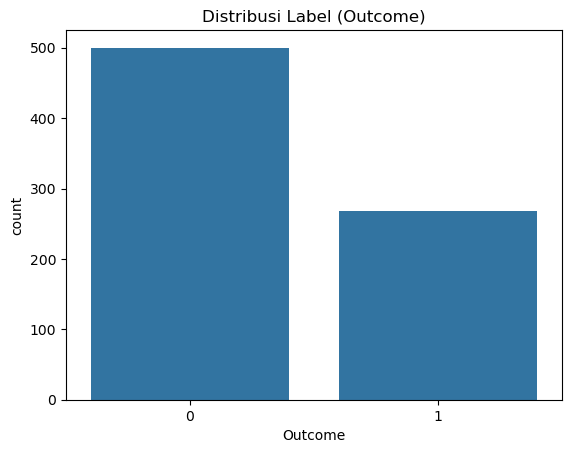

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korelasi fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Distribusi target
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Label (Outcome)")
plt.show()


## Feature Importance dari Random Forest
Kita lihat fitur mana yang paling berpengaruh terhadap prediksi berdasarkan Random Forest.


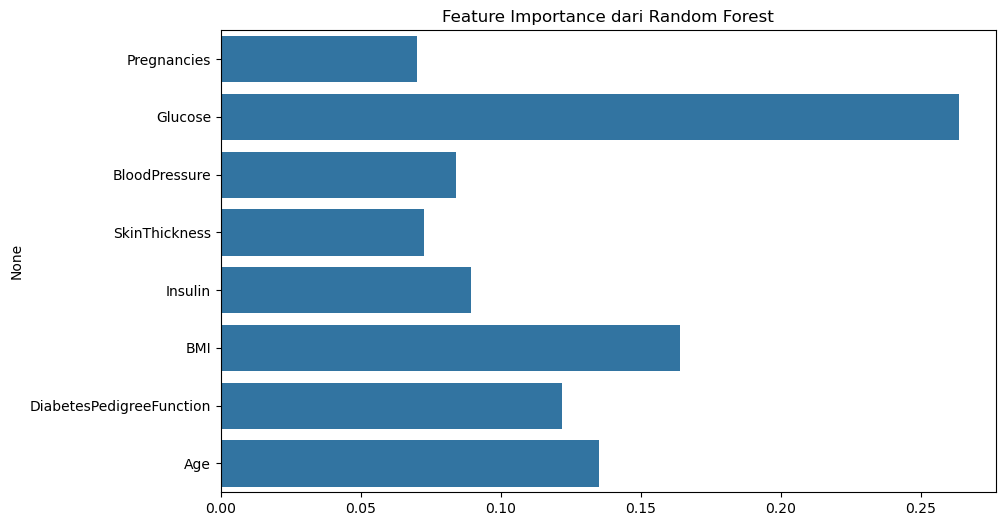

In [30]:
# Feature importance dari Random Forest
feature_names = X.columns
importances = rf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance dari Random Forest")
plt.show()


## Hyperparameter Tuning dengan GridSearchCV
Kita lakukan pencarian parameter terbaik untuk Random Forest menggunakan GridSearchCV.


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Random Forest setelah Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


Random Forest setelah Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Accuracy: 0.7532467532467533
